# 1. 패키지 참조 및 데이터 가져오기

In [33]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr, probplot, shapiro, kstest, anderson

from statsmodels.formula.api import ols
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
my_dpi=200
font_path='./NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [35]:
origin=load_data('diamonds')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------
price    다이아몬드 가격 (USD, $326 ~ $18,823)
carat    중량 (0.2~5.01)
cut      컷 품질 (Fair, Good, Very Good, Premium, Ideal)
color    색상 등급 - J (worst) to D (best)
clarity  투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        길이 mm (0~10.74)
y        너비 mm (0--58.9)
z        두께 mm (0--31.8)
depth    비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)


===== 데이터 크기 확인 =====
데이터셋 크기 : (53940, 10)
행 개수 : 53940개
열 개수 : 10개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


# 2. 전처리 작업

In [36]:
df=origin.drop_duplicates()
df1=df.drop(index=df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index)
df1.head()

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


In [37]:
col_1='cut'
col_2='clarity'

df1[f'{col_1}_{col_2}']=''
df1=df1.reset_index(drop=True)

for i in range(0,len(df1)):
    df1.loc[i,f'{col_1}_{col_2}']=f'{df1.loc[i,col_1]}_{df1.loc[i,col_2]}'

df1.head()

,price,carat,cut,color,clarity,x,y,z,depth,table,cut_clarity
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Ideal_SI2
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Premium_SI1
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Good_VS1
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Premium_VS2
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Good_SI2


In [38]:
col_1='cut'
col_2='color'

df1[f'{col_1}_{col_2}']=''
df1=df1.reset_index(drop=True)

for i in range(0,len(df1)):
    df1.loc[i,f'{col_1}_{col_2}']=f'{df1.loc[i,col_1]}_{df1.loc[i,col_2]}'

df1.head()

,price,carat,cut,color,clarity,x,y,z,depth,table,cut_clarity,cut_color
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Ideal_SI2,Ideal_E
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Premium_SI1,Premium_E
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Good_VS1,Good_E
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Premium_VS2,Premium_I
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Good_SI2,Good_J


In [39]:
col_1='color'
col_2='clarity'

df1[f'{col_1}_{col_2}']=''
df1=df1.reset_index(drop=True)

for i in range(0,len(df1)):
    df1.loc[i,f'{col_1}_{col_2}']=f'{df1.loc[i,col_1]}_{df1.loc[i,col_2]}'

df1.head()

,price,carat,cut,color,clarity,x,y,z,depth,table,cut_clarity,cut_color,color_clarity
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Ideal_SI2,Ideal_E,E_SI2
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Premium_SI1,Premium_E,E_SI1
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Good_VS1,Good_E,E_VS1
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Premium_VS2,Premium_I,I_VS2
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Good_SI2,Good_J,J_SI2


In [40]:
df1['log_price']=np.log(df1['price'])
df1['log_carat']=np.log(df1['carat'])
df1.head()

,price,carat,cut,color,clarity,x,y,z,depth,table,cut_clarity,cut_color,color_clarity,log_price,log_carat
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Ideal_SI2,Ideal_E,E_SI2,5.786897,-1.469676
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Premium_SI1,Premium_E,E_SI1,5.786897,-1.560648
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Good_VS1,Good_E,E_VS1,5.789960,-1.469676
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Premium_VS2,Premium_I,I_VS2,5.811141,-1.237874
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Good_SI2,Good_J,J_SI2,5.814131,-1.171183


In [41]:
def ols_report(tbl, data):
    xnames=[n for n in fit.model.exog_names if n!='const']
    indi_mydata1=data.filter(xnames)
    variables=[]
    for i, v in enumerate(tbl.tables[1].data):
        name=v[0].strip()
        if name not in xnames:
            continue
        j=list(indi_mydata1.columns).index(name)
        vif=variance_inflation_factor(indi_mydata1,j)

        p=float(v[4].strip())
        stars=lambda p: (
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B':v[1].strip(),
            '표준오차':v[2].strip(),
            'Beta':float(fit.params[name])*(data[name].std(ddof=1)/data[yname].std(ddof=1)),
            't':'%s%s'%(v[3].strip(), stars(p)),
            'p-value':p,
            '공차':1/vif,
            'vif':vif
        })

    rdf=DataFrame(variables)

    if rdf.empty:
        return None, "데이터 없음", "모델 유의하지 않음", []

    result_dict={}
    for i in [0,2]:
        for item in tbl.tables[i].data:
            n=len(item)
            for j in range(0, n, 2):
                key=item[j].strip()[:-1]
                value=item[j+1].strip()
                if not key or not value:
                    continue
                result_dict[key]=value
    
    result_report=f'R({result_dict['R-squared']}), R²({result_dict['Adj. R-squared']}), F({result_dict['F-statistic']}), 유의확률({result_dict['Prob (F-statistic)']}), Durbin-Watson({result_dict['Durbin-Watson']})'

    tpl='%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s)=%s, p %s 0.05).'
    model_report=tpl%(
        rdf['종속변수'][0],
        ','.join(list(rdf['독립변수'])),
        '유의하다' if float(result_dict['Prob (F-statistic)'])<=0.05 else '유의하지 않다',
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        '<=' if float(result_dict['Prob (F-statistic)'])<=0.05 else '>'
    )

    variable_reports=[]
    s='%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다.'

    for i in rdf.index:
        row=rdf.iloc[i]
        variable_reports.append(s%(row['독립변수'],
                                   row['B'],
                                   '<=' if float(row['p-value'])<0.05 else '>',
                                   row['종속변수'],
                                   '유의미한' if float(row['p-value'])<0.05 else '유의하지 않은'))
        
    return rdf, result_report, model_report, variable_reports

# 3. 📊 교효작용 데이터 추가 모형

In [46]:
mydata=df1.drop(['price','carat'], axis=1)
yname='log_price'
# mydata1=mydata.copy()

mydata1=pd.get_dummies(mydata, drop_first=True)
mydata1=mydata1.astype(float)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata1)
display(rdf)
print(r)

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,x,0.0721,0.006,0.079565,12.752***,0.000,0.000474,2108.050421
1,log_price,y,-0.0017,0.002,-0.001912,-0.775,0.438,0.001834,545.359592
2,log_price,z,0.0002,0.004,0.000144,0.049,0.961,0.001306,765.518182
3,log_price,depth,0.0025,0.001,0.003555,4.521***,0.000,0.000697,1433.796844
4,log_price,table,-7.507e-05,0.000,-0.000165,-0.226,0.821,0.001136,880.406896
...,...,...,...,...,...,...,...,...,...
146,log_price,color_clarity_J_SI2,0.0998,0.006,0.009243,17.428***,0.000,0.000000,inf
147,log_price,color_clarity_J_VS1,-0.0117,0.006,-0.001145,-2.095*,0.036,0.000000,inf
148,log_price,color_clarity_J_VS2,-0.0156,0.005,-0.001782,-3.073**,0.002,0.000000,inf
149,log_price,color_clarity_J_VVS1,-0.0692,0.012,-0.002528,-5.733***,0.000,0.000000,inf


R(0.984), R²(0.984), F(2.879e+04), 유의확률(0.00), Durbin-Watson(1.253)


# 4. 📊 다중공선성 제거 모형

In [67]:
mydata=df1.filter(['x','y','z','depth','table','log_carat','log_price'])
yname='log_price'
mydata1=mydata.copy()

x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata1)
print('=== 1차 회귀분석 ===')
display(rdf)
print(r)

count=2
while True:
    rdf, r, m, v=ols_report(tbl1, mydata1)
    if rdf['vif'].max()>=10:
        mydata1=mydata1.drop(rdf[rdf['vif']==rdf['vif'].max()]['독립변수'], axis=1)
        x=mydata1.drop(yname, axis=1)
        y=mydata1[yname]
        x_input=sm.add_constant(x)
        fit=sm.OLS(y, x_input).fit()
        tbl1=fit.summary()
        rdf, r, m, v=ols_report(tbl1, mydata1)
        print(f'=== {count}차 회귀분석 ===')
        display(rdf)
        print(r)
        count+=1
    else:
        break

print('\n')
print('***'*50)
print(f'총 {count} 번의 회귀분석 진행')

=== 1차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,x,-0.0442,0.011,-0.048776,-3.998***,0.000,0.000645,1549.499703
1,log_price,y,0.0088,0.004,0.009918,1.989*,0.047,0.001855,539.123229
2,log_price,z,0.0150,0.009,0.010348,1.727,0.084,0.001331,751.082633
3,log_price,depth,-0.0313,0.001,-0.044112,-29.839***,0.000,0.000982,1017.938743
4,log_price,table,-0.0187,0.001,-0.041270,-34.862***,0.000,0.001682,594.455997
5,log_price,log_carat,1.7425,0.018,1.003894,95.511***,0.000,0.019401,51.542736


R(0.935), R²(0.935), F(1.297e+05), 유의확률(0.00), Durbin-Watson(1.247)
=== 2차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.0037,0.004,0.004120,0.864,0.388,0.002608,383.411242
1,log_price,z,0.0019,0.008,0.001315,0.237,0.813,0.001489,671.514148
2,log_price,depth,-0.0291,0.001,-0.041050,-32.459***,0.000,0.001055,948.115140
3,log_price,table,-0.0186,0.001,-0.040931,-34.660***,0.000,0.002169,461.100313
4,log_price,log_carat,1.6832,0.011,0.969742,158.334***,0.000,0.028328,35.300911


R(0.935), R²(0.935), F(1.555e+05), 유의확률(0.00), Durbin-Watson(1.256)
=== 3차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.0484,0.004,0.054341,11.927***,0.0,0.002633,379.744562
1,log_price,z,-0.0851,0.008,-0.058921,-11.154***,0.0,0.002635,379.531893
2,log_price,table,-0.0137,0.001,-0.030114,-26.324***,0.0,0.002718,367.917663
3,log_price,log_carat,1.6951,0.011,0.976570,158.004***,0.0,0.063712,15.695520


R(0.934), R²(0.934), F(1.904e+05), 유의확률(0.00), Durbin-Watson(1.243)
=== 4차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,z,-0.0662,0.007,-0.045830,-8.858***,0.0,0.004135,241.845750
1,log_price,table,-0.0135,0.001,-0.029713,-25.950***,0.0,0.003389,295.084231
2,log_price,log_carat,1.7642,0.009,1.016352,195.069***,0.0,0.077415,12.917391


R(0.934), R²(0.934), F(2.532e+05), 유의확률(0.00), Durbin-Watson(1.234)
=== 5차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,z,-0.0345,0.007,-0.023895,-4.652***,0.0,0.846194,1.181763
1,log_price,log_carat,1.7171,0.009,0.989263,192.598***,0.0,0.846194,1.181763


R(0.933), R²(0.933), F(3.748e+05), 유의확률(0.00), Durbin-Watson(1.228)


******************************************************************************************************************************************************
총 6 번의 회귀분석 진행


> z 변수보다 log_carat의 표준화계수 절대값이 높으므로, z 변수를 제거 후 명목형 변수 더미처리 이후 회귀분석 재차 진행

In [68]:
mydata=df1.drop(['x','y','z','depth','table'], axis=1)
yname='log_price'
# mydata1=mydata.copy()

mydata1=pd.get_dummies(mydata, drop_first=True)
mydata1=mydata1.astype(float)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()

rdf, r, m, v=ols_report(tbl1, mydata1)
display(rdf)
print(r)

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,6.076e-05,4.26e-07,0.238774,142.624***,0.0,0.039884,25.072636
1,log_price,carat,-0.6764,0.006,-0.315515,-115.000***,0.0,0.007919,126.280410
2,log_price,log_carat,1.9982,0.003,1.151205,673.391***,0.0,0.052610,19.007825
3,log_price,cut_Good,0.1229,0.006,0.034822,19.149***,0.0,0.000000,inf
4,log_price,cut_Ideal,0.1796,0.006,0.086719,29.013***,0.0,0.000000,inf
...,...,...,...,...,...,...,...,...,...
143,log_price,color_clarity_J_SI2,0.1024,0.005,0.009488,20.972***,0.0,0.000000,inf
144,log_price,color_clarity_J_VS1,-0.0284,0.005,-0.002785,-5.969***,0.0,0.000000,inf
145,log_price,color_clarity_J_VS2,-0.0166,0.004,-0.001892,-3.822***,0.0,0.000000,inf
146,log_price,color_clarity_J_VVS1,-0.1060,0.010,-0.003875,-10.298***,0.0,0.000000,inf


R(0.989), R²(0.989), F(4.077e+04), 유의확률(0.00), Durbin-Watson(0.978)


# 5. 📊 유의하지 않은 변수 제거를 통한 최종 모형

In [69]:
mydata=df1.filter(['x','y','z','depth','table','log_carat','log_price'])
yname='log_price'
mydata1=mydata.copy()

x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata1)
print('=== 1차 회귀분석 ===')
display(rdf)
print(r)

count=2
while True:
    rdf, r, m, v=ols_report(tbl1, mydata1)
    if rdf['vif'].max()>=10:
        mydata1=mydata1.drop(rdf[rdf['vif']==rdf['vif'].max()]['독립변수'], axis=1)
        x=mydata1.drop(yname, axis=1)
        y=mydata1[yname]
        x_input=sm.add_constant(x)
        fit=sm.OLS(y, x_input).fit()
        tbl1=fit.summary()
        rdf, r, m, v=ols_report(tbl1, mydata1)
        print(f'=== {count}차 회귀분석 ===')
        display(rdf)
        print(r)
        count+=1
    else:
        break

print('\n')
print('***'*50)
print(f'총 {count} 번의 회귀분석 진행')

=== 1차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,x,-0.0442,0.011,-0.048776,-3.998***,0.000,0.000645,1549.499703
1,log_price,y,0.0088,0.004,0.009918,1.989*,0.047,0.001855,539.123229
2,log_price,z,0.0150,0.009,0.010348,1.727,0.084,0.001331,751.082633
3,log_price,depth,-0.0313,0.001,-0.044112,-29.839***,0.000,0.000982,1017.938743
4,log_price,table,-0.0187,0.001,-0.041270,-34.862***,0.000,0.001682,594.455997
5,log_price,log_carat,1.7425,0.018,1.003894,95.511***,0.000,0.019401,51.542736


R(0.935), R²(0.935), F(1.297e+05), 유의확률(0.00), Durbin-Watson(1.247)
=== 2차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.0037,0.004,0.004120,0.864,0.388,0.002608,383.411242
1,log_price,z,0.0019,0.008,0.001315,0.237,0.813,0.001489,671.514148
2,log_price,depth,-0.0291,0.001,-0.041050,-32.459***,0.000,0.001055,948.115140
3,log_price,table,-0.0186,0.001,-0.040931,-34.660***,0.000,0.002169,461.100313
4,log_price,log_carat,1.6832,0.011,0.969742,158.334***,0.000,0.028328,35.300911


R(0.935), R²(0.935), F(1.555e+05), 유의확률(0.00), Durbin-Watson(1.256)
=== 3차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.0484,0.004,0.054341,11.927***,0.0,0.002633,379.744562
1,log_price,z,-0.0851,0.008,-0.058921,-11.154***,0.0,0.002635,379.531893
2,log_price,table,-0.0137,0.001,-0.030114,-26.324***,0.0,0.002718,367.917663
3,log_price,log_carat,1.6951,0.011,0.976570,158.004***,0.0,0.063712,15.695520


R(0.934), R²(0.934), F(1.904e+05), 유의확률(0.00), Durbin-Watson(1.243)
=== 4차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,z,-0.0662,0.007,-0.045830,-8.858***,0.0,0.004135,241.845750
1,log_price,table,-0.0135,0.001,-0.029713,-25.950***,0.0,0.003389,295.084231
2,log_price,log_carat,1.7642,0.009,1.016352,195.069***,0.0,0.077415,12.917391


R(0.934), R²(0.934), F(2.532e+05), 유의확률(0.00), Durbin-Watson(1.234)
=== 5차 회귀분석 ===


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,z,-0.0345,0.007,-0.023895,-4.652***,0.0,0.846194,1.181763
1,log_price,log_carat,1.7171,0.009,0.989263,192.598***,0.0,0.846194,1.181763


R(0.933), R²(0.933), F(3.748e+05), 유의확률(0.00), Durbin-Watson(1.228)


******************************************************************************************************************************************************
총 6 번의 회귀분석 진행


In [70]:
mydata=df1.drop(['x','y','z','depth','table'], axis=1)
yname='log_price'
# mydata1=mydata.copy()

mydata1=pd.get_dummies(mydata, drop_first=True)
mydata1=mydata1.astype(float)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()

rdf, r, m, v=ols_report(tbl1, mydata1)
display(rdf)
print(r)

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,6.076e-05,4.26e-07,0.238774,142.624***,0.0,0.039884,25.072636
1,log_price,carat,-0.6764,0.006,-0.315515,-115.000***,0.0,0.007919,126.280410
2,log_price,log_carat,1.9982,0.003,1.151205,673.391***,0.0,0.052610,19.007825
3,log_price,cut_Good,0.1229,0.006,0.034822,19.149***,0.0,0.000000,inf
4,log_price,cut_Ideal,0.1796,0.006,0.086719,29.013***,0.0,0.000000,inf
...,...,...,...,...,...,...,...,...,...
143,log_price,color_clarity_J_SI2,0.1024,0.005,0.009488,20.972***,0.0,0.000000,inf
144,log_price,color_clarity_J_VS1,-0.0284,0.005,-0.002785,-5.969***,0.0,0.000000,inf
145,log_price,color_clarity_J_VS2,-0.0166,0.004,-0.001892,-3.822***,0.0,0.000000,inf
146,log_price,color_clarity_J_VVS1,-0.1060,0.010,-0.003875,-10.298***,0.0,0.000000,inf


R(0.989), R²(0.989), F(4.077e+04), 유의확률(0.00), Durbin-Watson(0.978)


In [71]:
xnames=list(rdf[rdf['p-value']>0.05]['독립변수'])

mydata=df1.drop(['x','y','z','depth','table'], axis=1)
yname='log_price'
# mydata1=mydata.copy()

mydata1=pd.get_dummies(mydata, drop_first=True)
mydata1=mydata1.astype(float)
mydata1=mydata1.drop(xnames, axis=1)
x=mydata1.drop(yname, axis=1)
y=mydata1[yname]
x_input=sm.add_constant(x)
fit=sm.OLS(y, x_input).fit()
tbl1=fit.summary()
rdf, r, m, v=ols_report(tbl1, mydata1)

display(rdf)
print(r)

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,6.076e-05,4.26e-07,0.238774,142.624***,0.000,0.039870,25.081576
1,log_price,carat,-0.6764,0.006,-0.315515,-115.000***,0.000,0.007919,126.280410
2,log_price,log_carat,1.9982,0.003,1.151205,673.391***,0.000,0.052610,19.007825
3,log_price,cut_Good,0.1270,0.009,0.035986,13.506***,0.000,0.000000,inf
4,log_price,cut_Ideal,0.1777,0.013,0.085823,14.150***,0.000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
131,log_price,color_clarity_J_SI2,0.1025,0.005,0.009495,21.015***,0.000,0.000000,inf
132,log_price,color_clarity_J_VS1,-0.0371,0.011,-0.003642,-3.360**,0.001,0.000000,inf
133,log_price,color_clarity_J_VS2,-0.0165,0.005,-0.001877,-3.139**,0.002,0.000000,inf
134,log_price,color_clarity_J_VVS1,-0.1065,0.010,-0.003892,-10.314***,0.000,0.000000,inf


R(0.989), R²(0.989), F(4.077e+04), 유의확률(0.00), Durbin-Watson(0.978)


📕 선형성 검정
RESET F-statistic: 2157.4979
p-value: 0.0000
선형성/기능형 위배 가능성이 있음 (5% 유의수준)


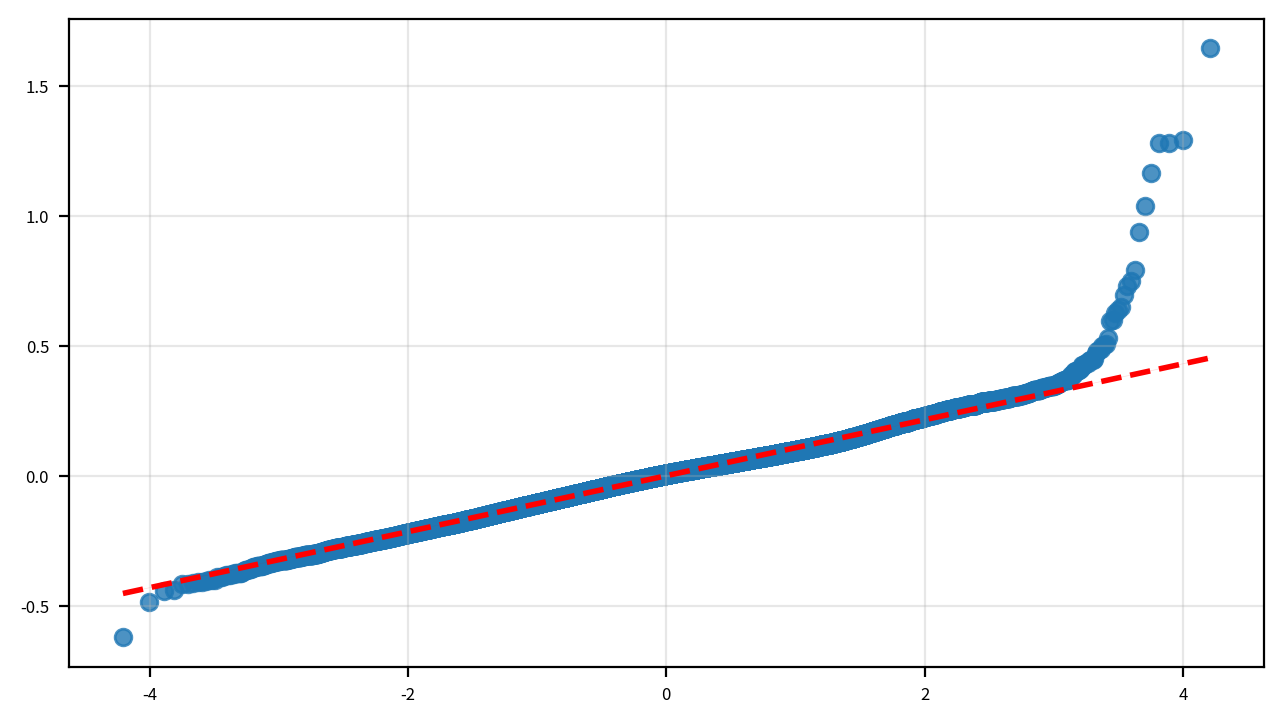

루트 1MSE 구간에 포함된 잔차 비율: 71.49%
루트 2MSE 구간에 포함된 잔차 비율: 94.71%
루트 3MSE 구간에 포함된 잔차 비율: 99.63%


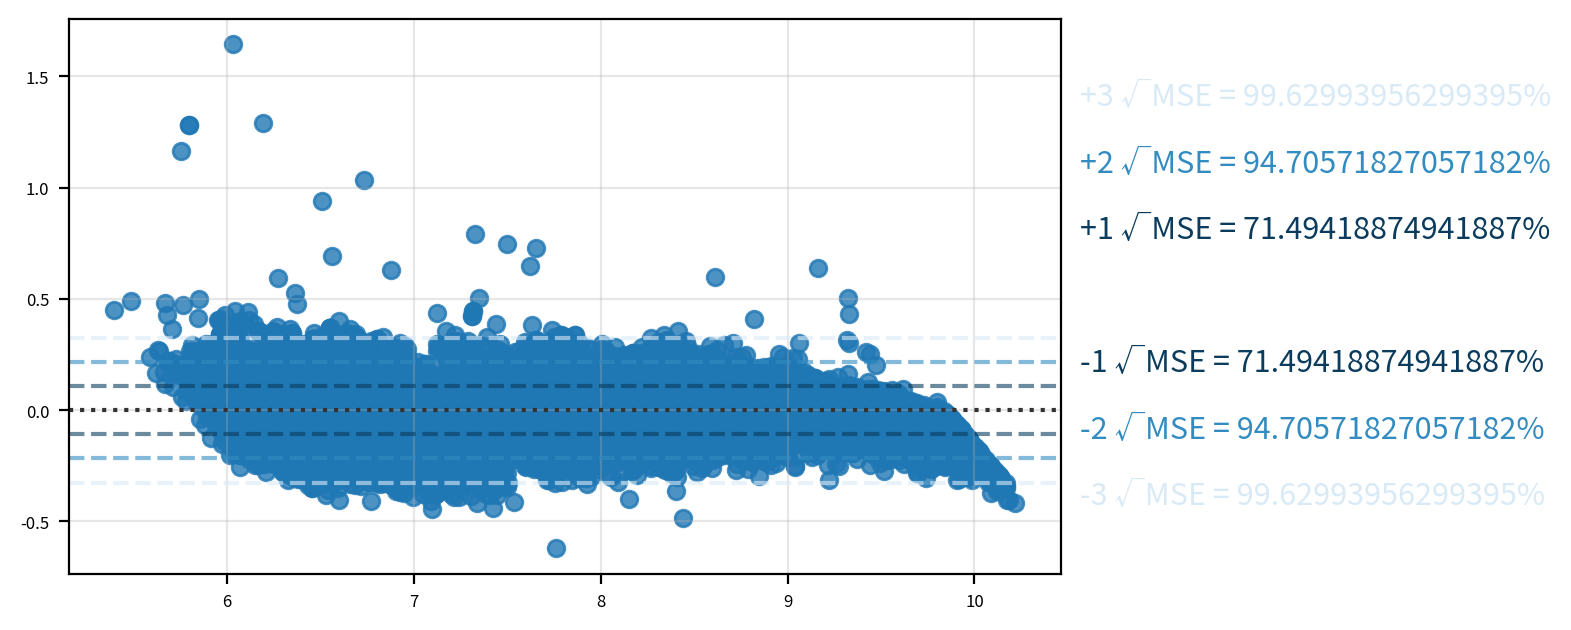

🎯 잔차의 정규성, 등분산성, 독립성 검정
Anderson-Darling statistic: 90.4507, 5% 임계값: 0.7870
정규성 가정 위배 가능성이 있음 (5% 유의수준)
Breusch-Pagan statistic: 37.612, p-value = 0.000
이분산성 존재(등분산 아님)
Durbin-Watson=0.978
잔차에 양(+)의 자기상관이 존재할 가능성 있음 (독립성 위반)
🎓 최종 결과 보고
log_price에 대하여 price,carat,log_carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_clarity_Fair_IF,cut_clarity_Fair_SI1,cut_clarity_Fair_SI2,cut_clarity_Fair_VS1,cut_clarity_Fair_VS2,cut_clarity_Fair_VVS1,cut_clarity_Fair_VVS2,cut_clarity_Good_I1,cut_clarity_Good_IF,cut_clarity_Good_SI1,cut_clarity_Good_VS1,cut_clarity_Good_VS2,cut_clarity_Good_VVS1,cut_clarity_Good_VVS2,cut_clarity_Ideal_IF,cut_clarity_Ideal_SI2,cut_clarity_Ideal_VS1,cut_clarity_Ideal_VS2,cut_clarity_Ideal_VVS1,cut_clarity_Ideal_VVS2,cut_clarity_Premium_I1,cut_clarity_Premium_IF,cut_clarity_Premium_SI2,cut_clarity_Premium_VS1,cut_clarity_Premium_VS2,cut_clarity

In [72]:
# 잔차 검정
print('='*50)
print('📕 선형성 검정')
print('='*50)
reset_res=linear_reset(fit, power=2, use_f=True)
print(f'RESET F-statistic: {reset_res.fvalue:.4f}')
print(f'p-value: {reset_res.pvalue:.4f}')
if reset_res.pvalue<0.05:
    print('선형성/기능형 위배 가능성이 있음 (5% 유의수준)')
else:
    print('선형성 가정 위배 근거 없음 (5% 유의수준)')

(x,y),_=probplot(fit.resid)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.regplot(x=x, y=y, line_kws={'color':'red', 'linestyle':'--', 'linewidth':2})
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

rr=fit.resid
mse_sq=fit.mse_resid
mse_root=np.sqrt(mse_sq)
colors=['#0B3C5D', '#328CC1', '#D9EAF7']
r1=rr[(rr>-mse_root)&(rr<mse_root)].count()/rr.count()*100
r2=rr[(rr>-2*mse_root)&(rr<2*mse_root)].count()/rr.count()*100
r3=rr[(rr>-3*mse_root)&(rr<3*mse_root)].count()/rr.count()*100
mse_r=[r1,r2,r3]
print(f'루트 1MSE 구간에 포함된 잔차 비율: {r1:.2f}%')
print(f'루트 2MSE 구간에 포함된 잔차 비율: {r2:.2f}%')
print(f'루트 3MSE 구간에 포함된 잔차 비율: {r3:.2f}%')
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.residplot(x=fit.fittedvalues, y=fit.resid)
ax.grid(True, alpha=0.3)
for i, c in enumerate(colors):
    k=i+1
    y_pos=k*mse_root
    ax.axhline(y=y_pos, color=c, linestyle='--', alpha=0.6)
    ax.axhline(y=-y_pos, color=c, linestyle='--', alpha=0.6)
    ax.text(x=1.02, y=0.5+0.12*k,
            s=f'+{k} √MSE = {mse_r[i]}%',
            transform=ax.transAxes,
            ha='left', va='center', fontsize=11, color=c)
    ax.text(x=1.02, y=0.5-0.12*k,
            s=f'-{k} √MSE = {mse_r[i]}%',
            transform=ax.transAxes,
            ha='left', va='center', fontsize=11, color=c)
plt.show()
plt.close()

# 잔차의 정규성, 등분산성, 독립성 검정
print('='*50)
print('🎯 잔차의 정규성, 등분산성, 독립성 검정')
print('='*50)
if len(origin)<5000:
    method='Shapiro-Wilk'
    s, p=shapiro(fit.resid)
    print(f'{method} statistic: {s:.4f}, p-value: {p:.4f}')
    violated=p<0.05
else:
    method='Anderson-Darling'
    ad_res=anderson(fit.resid, dist='norm')
    crit_levels=ad_res.significance_level.tolist()
    crit_values=ad_res.critical_values.tolist()
    crit_5=crit_values[crit_levels.index(5.0)] if 5.0 in crit_levels else None
    print(f'{method} statistic: {ad_res.statistic:.4f}, 5% 임계값: {crit_5:.4f}')
    violated=crit_5 is not None and ad_res.statistic>crit_5
print('정규성 가정 위배 가능성이 있음 (5% 유의수준)' if violated else '정규성 가정 위배 근거 없음 (5% 유의수준)')

names=['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
bp_test=het_breuschpagan(fit.resid, fit.model.exog)
bp=DataFrame(bp_test, index=names, columns=['value'])
p_bp=bp.loc['F p-value', 'value']
print(f'Breusch-Pagan statistic: {bp.loc['F Statistic', 'value']:.3f}, p-value = {p_bp:.3f}')
print(f'{'이분산성 존재(등분산 아님)' if p_bp<=0.05 else '등분산성 만족'}')

dw=durbin_watson(fit.resid)
if 1.5<=dw<=2.5:
    interpretation='잔차는 독립성을 만족함 (자기상관 없음)'
elif dw<1.5:
    interpretation='잔차에 양(+)의 자기상관이 존재할 가능성 있음 (독립성 위반)'
else:
    interpretation='잔차에 음(-)의 자기상관이 존재할 가능성 있음 (독립성 위반)'
print(f'Durbin-Watson={dw:.3f}\n{interpretation}')

# 최종 결과 보고
print('='*50)
print('🎓 최종 결과 보고')
print('='*50)
print(m)
print('\n'.join(v))